In [1]:
#importing libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math

In [2]:
#to return a list containing the names of the entries in the directory given by path
import os
os.listdir("C:/Users/ASMITA/Documents/Python_rasteranalysis/kawa_space/place2/data/raster")

['LC08_L2SP_141042_20201121_20210315_02_T1.tar',
 'LC08_L2SP_141042_20201121_20210315_02_T1_ANG.txt',
 'LC08_L2SP_141042_20201121_20210315_02_T1_MD5.txt',
 'LC08_L2SP_141042_20201121_20210315_02_T1_MTL.txt',
 'LC08_L2SP_141042_20201121_20210315_02_T1_MTL.xml',
 'LC08_L2SP_141042_20201121_20210315_02_T1_QA_PIXEL.TIF',
 'LC08_L2SP_141042_20201121_20210315_02_T1_QA_RADSAT.TIF',
 'LC08_L2SP_141042_20201121_20210315_02_T1_SR_B1.TIF',
 'LC08_L2SP_141042_20201121_20210315_02_T1_SR_B2.TIF',
 'LC08_L2SP_141042_20201121_20210315_02_T1_SR_B3.TIF',
 'LC08_L2SP_141042_20201121_20210315_02_T1_SR_B4.TIF',
 'LC08_L2SP_141042_20201121_20210315_02_T1_SR_B5.TIF',
 'LC08_L2SP_141042_20201121_20210315_02_T1_SR_B6.TIF',
 'LC08_L2SP_141042_20201121_20210315_02_T1_SR_B7.TIF',
 'LC08_L2SP_141042_20201121_20210315_02_T1_SR_QA_AEROSOL.TIF',
 'LC08_L2SP_141042_20201121_20210315_02_T1_ST_ATRAN.TIF',
 'LC08_L2SP_141042_20201121_20210315_02_T1_ST_B10.TIF',
 'LC08_L2SP_141042_20201121_20210315_02_T1_ST_CDIST.TIF',
 '

In [3]:
#giving band info
#import bands as separate 1 band raster
#making variables for bands needed for the index equation
Band5 = rasterio.open("C:/Users/ASMITA/Documents/Python_rasteranalysis/kawa_space/place2/data/raster/LC08_L2SP_141042_20201121_20210315_02_T1_SR_B5.TIF")
Band4 = rasterio.open("C:/Users/ASMITA/Documents/Python_rasteranalysis/kawa_space/place2/data/raster/LC08_L2SP_141042_20201121_20210315_02_T1_SR_B4.TIF")

#msavi2 formula is
#MSAVI2 = 1/2 * ((2*(NIR+1)) - (((2*NIR)+1)**2 - 8*(NIR-red))**1/2)

In [4]:
#generate nir and red objects as arrays in float64 format
red = Band4.read(1).astype('float64')
nir = Band5.read(1).astype('float64')

In [6]:
#just checking for nir
nir

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#Instead of applying the whole formula at once we can break it in a small small part making some variables

In [18]:
a = (2*(nir+1))

In [21]:
b = ((2*nir)+1)

In [22]:
c = (8*(nir-red))

In [23]:
d = b**2

In [24]:
e = (1/2)

In [25]:
f = (d-c)**e

In [26]:
g = (a-f)

In [27]:
msavi2 = e*g

In [28]:
#this is the final msavi2 array result
msavi2

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])

In [31]:
##exporting msavi2 image
msaviImage = rasterio.open("C:/Users/ASMITA/Documents/Python_rasteranalysis/kawa_space/place2/data/msaviPlace2.tif",'w',driver='Gtiff',width=Band4.width, height=Band4.height, count=1, crs=Band4.crs, transform=Band4.transform,dtype='float64')
msaviImage.write(msavi2,1)
msaviImage.close()

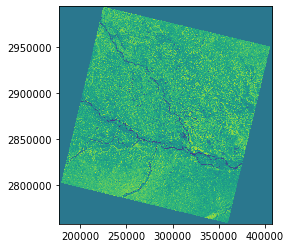

In [32]:
#plotting msavi2 result image
msavi2 = rasterio.open("C:/Users/ASMITA/Documents/Python_rasteranalysis/kawa_space/place2/data/msaviPlace2.tif")
plot.show(msavi2)

In [33]:
#importing new library to read shapefile
import geopandas as gdp

In [34]:
#polygon info
#polygon of given place
polygon = gdp.read_file("C:/Users/ASMITA/Documents/Python_rasteranalysis/kawa_space/place2/data/poly2_projected.shp")
#to print shapefile's details like number of row, column and the value and name of the columns
print(polygon.shape)
print(polygon.head)

(1, 15)
<bound method NDFrame.head of    OBJECTID  OID_   Name FolderPath  SymbolID  AltMode  Base  Clamped  \
0         1     0  poly3  poly3.kmz         0        0   0.0       -1   

   Extruded Snippet PopupInfo  Shape_Leng  Shape_Le_1   Shape_Area  \
0         0    None      None    0.002843    298.9275  5565.181911   

                                            geometry  
0  POLYGON Z ((385660.242 2886526.935 0.000, 3855...  >


<module 'matplotlib.pyplot' from 'C:\\Users\\ASMITA\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

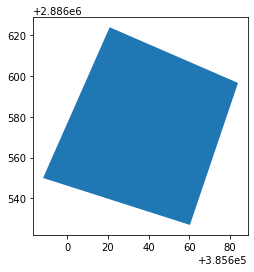

In [35]:
#to plot shapefile
polygon.plot()
plt